In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os

## Zmiana rozmaru zdjęć oraz powiększenie zbioru danych 

In [122]:
root = os.getcwd()
save_dir = "C:\\Users\\adaml\\OneDrive - Politechnika Wroclawska\\pwr\\Semestr 5\\POIWK_L\\images\\keras_train"
print(save_dir)
os.chdir("C:\\Users\\adaml\\OneDrive - Politechnika Wroclawska\\pwr\\Semestr 5\\POIWK_L\\filmy")
dirs = [dir for dir in os.scandir() if os.path.isdir(dir)]
labels = [x.name for x in dirs]
labels

C:\Users\adaml\OneDrive - Politechnika Wroclawska\pwr\Semestr 5\POIWK_L\images\keras_train


['Konstal 105Na',
 'Moderus Beta',
 'Moderus Gamma',
 'Protram 105NaWr',
 'Skoda 19T']

In [123]:
def show_img(img):
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()

In [124]:
def augument_image(img,name,save_dir):
    img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot90.png"),img_rot)
    #img_rot = cv2.rotate(img_rot, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot180.png"),img_rot)
    #img_rot = cv2.rotate(img_rot, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot270.png"),img_rot)

    alpha_ = 1.2
    beta_ = 50
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_0.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_0.png"),img_rot_light)
    alpha_ = 1.2
    beta_ = 10
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_1.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_1.png"),img_rot_light)

    alpha_ = 0.3
    beta_ = 10
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_2.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_2.png"),img_rot_light)
    alpha_ = 0.3
    beta_ = 50
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_3.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_3.png"),img_rot_light)


In [125]:
dim = (256, 256)

for dir in dirs:
    print(dir.name)
    os.chdir(dir) 
    for index,file in enumerate(list(os.listdir())):
        try:
            renamed = f"{dir.name}_{index}.png"
            os.rename(file,renamed)
        except FileExistsError:
            print(f"File {renamed} exists")   
        img = cv2.imread(renamed)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        try:
            cv2.imwrite(os.path.join(save_dir,dir.name,renamed),resized)
        except FileExistsError:
            os.remove(save_dir+renamed)
            cv2.imwrite(os.path.join(save_dir,renamed),resized)
        augument_image(resized,f"{dir.name}_{index}",os.path.join(save_dir,dir.name))

        
    os.chdir('../')

print(f"Images:{len(list(os.listdir(save_dir)))}")

Konstal 105Na
File Konstal 105Na_0.png exists
File Konstal 105Na_1.png exists
File Konstal 105Na_2.png exists
File Konstal 105Na_4.png exists
File Konstal 105Na_5.png exists
File Konstal 105Na_6.png exists
File Konstal 105Na_7.png exists
File Konstal 105Na_8.png exists
File Konstal 105Na_9.png exists
File Konstal 105Na_11.png exists
File Konstal 105Na_12.png exists
File Konstal 105Na_13.png exists
File Konstal 105Na_14.png exists
File Konstal 105Na_15.png exists
File Konstal 105Na_16.png exists
File Konstal 105Na_18.png exists
File Konstal 105Na_19.png exists
File Konstal 105Na_20.png exists
Moderus Beta
File Moderus Beta_2.png exists
File Moderus Beta_3.png exists
File Moderus Beta_4.png exists
File Moderus Beta_5.png exists
File Moderus Beta_6.png exists
File Moderus Beta_7.png exists
File Moderus Beta_8.png exists
File Moderus Beta_9.png exists
File Moderus Beta_10.png exists
File Moderus Beta_11.png exists
File Moderus Beta_12.png exists
File Moderus Beta_13.png exists
File Moderus

## Wczytywanie obrazów jako dataset

In [126]:
import re
def load_dataset(path,labels):
    Y_label = {lab:i for i,lab in enumerate(labels)}
    X = []
    Y = []
    dirs = list(os.listdir(path))
    for index,file in enumerate(dirs):
        print(f"{index+1}/{len(dirs)}")
        img = cv2.imread(os.path.join(path,file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img)
        print(Y_label[list(re.split('_',file))[0]],list(re.split('_',file))[0])
        Y.append(Y_label[list(re.split('_',file))[0]])
    
    plt.rcParams["figure.figsize"] = (10,10)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X[i],plt.cm.binary,interpolation='bicubic')
        plt.xlabel(labels[Y[i]])
    plt.show()
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

Found 1234 files belonging to 5 classes.


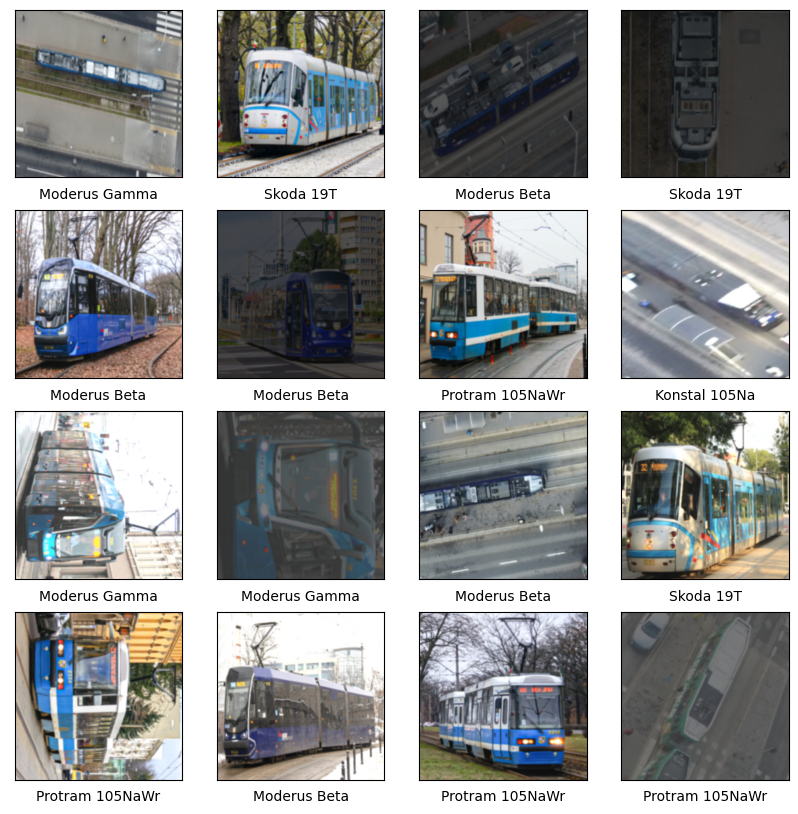

In [127]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\adaml\\OneDrive - Politechnika Wroclawska\\pwr\\Semestr 5\\POIWK_L\\images\\keras_train",batch_size=32,shuffle=True)
data = data.map(lambda x, y : (x/255,y))
data_np = data.as_numpy_iterator()
batch = data_np.next()
plt.rcParams["figure.figsize"] = (10,10)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch[0][i],plt.cm.binary,interpolation='bicubic')
    plt.xlabel(labels[batch[1][i]])
plt.show()

## Dzielenie danych na zbiory
#### Liczby przedstawiają ilość batchy

In [128]:
train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)
print(len(data),train_size,val_size,test_size, train_size+val_size+test_size)

39 28 8 3 39


In [129]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

In [130]:
#X_train, X_test, Y_train, Y_test = train_test_split(data_np[0],data_np[1], test_size=0.30, random_state=42)
#X_train = X_train.astype('float32') / 255
#X_test = X_test.astype('float32') / 255
#print(f"Train size:{len(X_train),len(Y_train)}\nTest size:{len(X_test),len(Y_test)}")
#X_train.shape,Y_train.shape

## Tworzenie sieci neuronowej

In [146]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [147]:
nn = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), activation='relu',input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    Flatten(),

    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

nn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

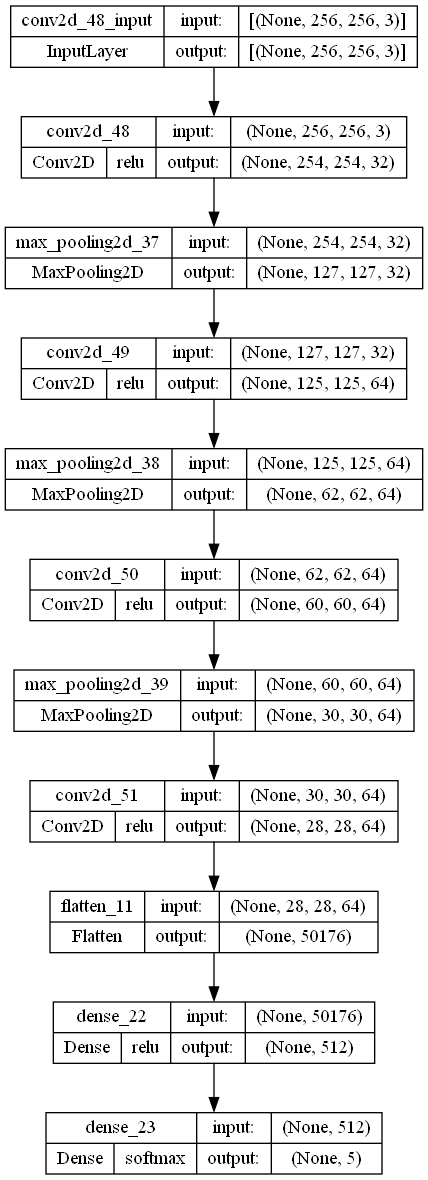

In [148]:
from tensorflow.keras.utils import plot_model
plot_model(nn, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [149]:
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 30, 30, 64)     

In [150]:
model_path = "C:\\Users\\adaml\\OneDrive - Politechnika Wroclawska\\pwr\\Semestr 5\\POIWK_L\\tram_network.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    verbose = 1,
    save_best_only=True)

In [151]:
history = nn.fit(
                train_data, 
                epochs=50, 
                validation_data=(val_data),
                callbacks=[EarlyStopping(patience=6),model_checkpoint_callback])           

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 2.1874 - accuracy: 0.2812
Epoch 1: val_accuracy improved from -inf to 0.32031, saving model to C:\Users\adaml\OneDrive - Politechnika Wroclawska\pwr\Semestr 5\POIWK_L\tram_network.h5
28/28 [==============================] - 41s 1s/step - loss: 2.1874 - accuracy: 0.2812 - val_loss: 1.5307 - val_accuracy: 0.3203
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 1.5195 - accuracy: 0.3850
Epoch 2: val_accuracy improved from 0.32031 to 0.45312, saving model to C:\Users\adaml\OneDrive - Politechnika Wroclawska\pwr\Semestr 5\POIWK_L\tram_network.h5
28/28 [==============================] - 40s 1s/step - loss: 1.5195 - accuracy: 0.3850 - val_loss: 1.3789 - val_accuracy: 0.4531
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 1.1476 - accuracy: 0.6138
Epoch 3: val_accuracy improved from 0.45312 to 0.71484, saving model to C:\Users\adaml\OneDrive - Politechnika Wroclawska\pwr\Semestr 5\POIWK_L

<AxesSubplot: >

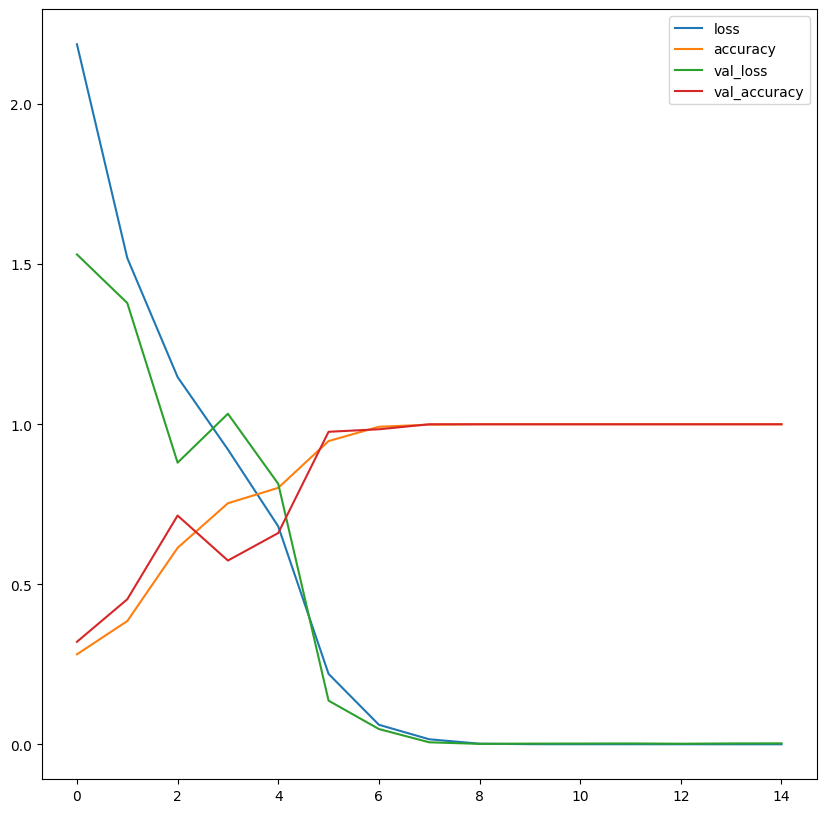

In [152]:
pd.DataFrame(history.history).plot()

In [156]:
from tensorflow.keras.models import load_model
nn = load_model(model_path)

In [157]:
X_test = []
Y_test = []

for x,y in test_data.as_numpy_iterator():
    for val in x:
        X_test.append(val)
    for val in y:
        Y_test.append(val)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

3/3 [==============================] - 1s 157ms/step


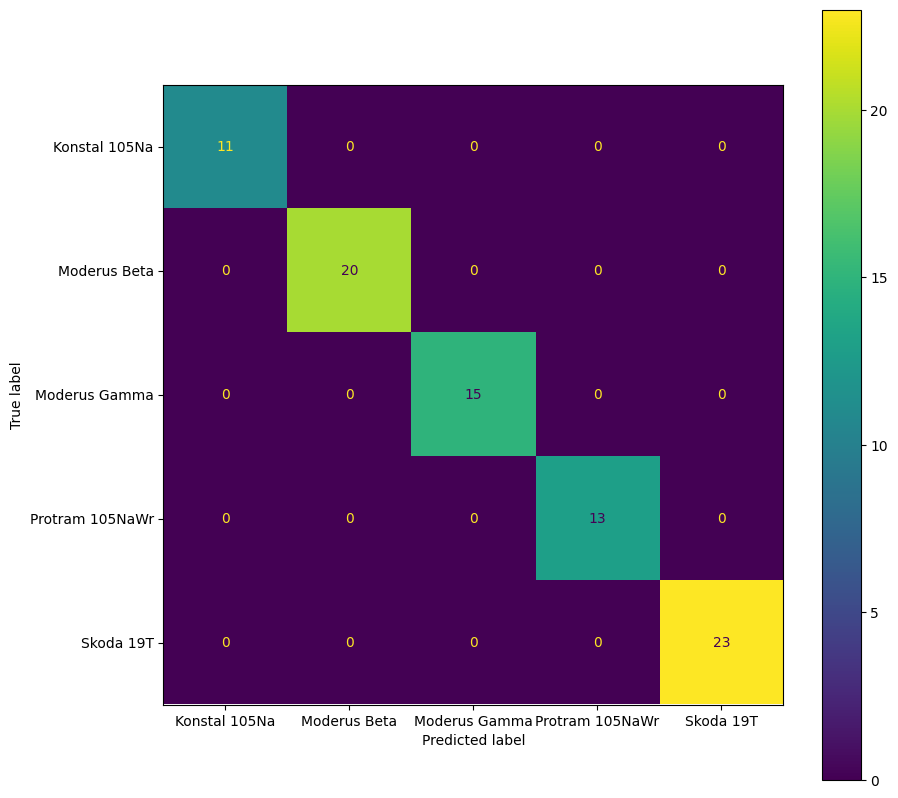

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import numpy as np

Y_pred = np.argmax(nn.predict(X_test), axis=1)
cm = confusion_matrix(Y_test, Y_pred, labels=np.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(labels))
disp.plot()

In [161]:
score = accuracy_score(Y_test,Y_pred)
print(f'Precyzja modelu: {np.round(score*100,3)}%')

Precyzja modelu: 100.0%
